In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

def cosamp(phi, u, s, epsilon=1e-10, max_iter=1000):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")
        
        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)
        
        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b
        
        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter
        
    return a

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
sys.path.append(os.path.join('..','UTILS'))
#from cosamp_fn import cosamp
# cosamp function is available at https://github.com/avirmaux/CoSaMP
# copy function from ipynb into cosamp_fn.py and place in UTILS folder

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 16})

In [ ]:
n=1000
k=5

#Build Psi
Psi=dct(np.identity(n))

s=np.zeros(n)
perm = np.floor(np.random.rand(k) * n).astype(int)
s[perm]=1

x=Psi @ s
x1=np.linalg.norm(s,ord=1)
x0=np.linalg.norm(s,ord=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<function matplotlib.pyplot.show(*args, **kw)>

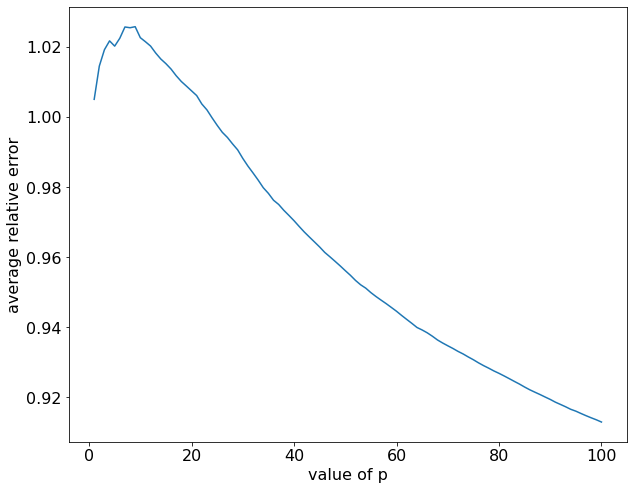

In [ ]:
err=[]
r_error=[]

for p in np.arange(1,101):
  for i in range(10):
    C=np.random.randn(p,n)
    y=C @ Psi @ s
    Theta=C @ Psi
    s_hat=cosamp(Theta,y,p)
    e= np.linalg.norm(s-s_hat)/np.linalg.norm(s)
    err.append(e)
  
  error=np.mean(err)
  r_error.append(error)

plt.figure()
plt.plot(np.arange(1,101),r_error)
plt.xlabel('value of p')
plt.ylabel('average relative error')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


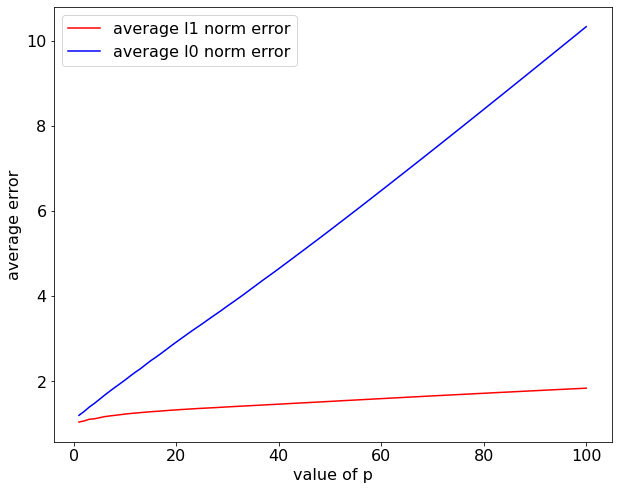

In [8]:
#l1 and l0 norm errors
err1=[]
r_error1=[]
err0=[]
r_error0=[]

for p in np.arange(1,101):
  for i in range(10):
    C1=np.random.randn(p,n)
    y1=C1 @ x
    Theta1=C1 @ Psi
    s_hat1=cosamp(Theta1,y1,p)
    e1= np.linalg.norm(s-s_hat1,ord=1)/x1
    err1.append(e1)
    e0= np.linalg.norm(s-s_hat1,ord=0)/x0
    err0.append(e0)
  
  error1=np.mean(err1)
  r_error1.append(error1)
  error0=np.mean(err0)
  r_error0.append(error0)

plt.figure()
plt.plot(np.arange(1,101),r_error1, color='r', label='average l1 norm error')
plt.plot(np.arange(1,101),r_error0, color='b', label='average l0 norm error')
plt.xlabel('value of p')
plt.ylabel('average error')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


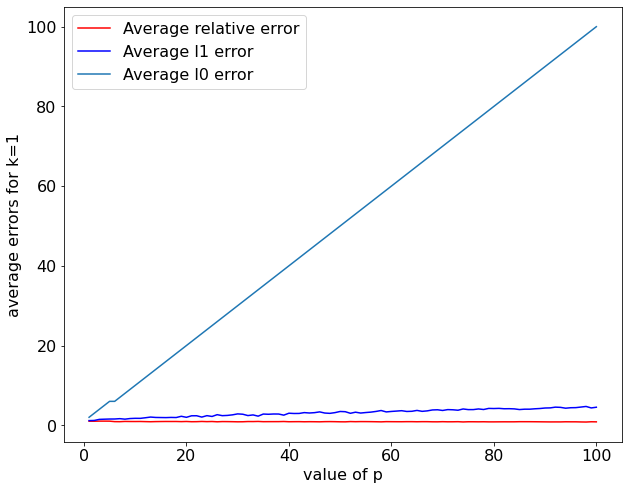

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


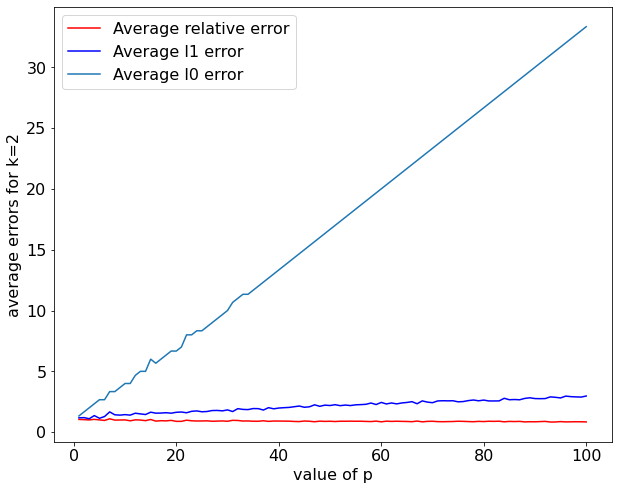

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


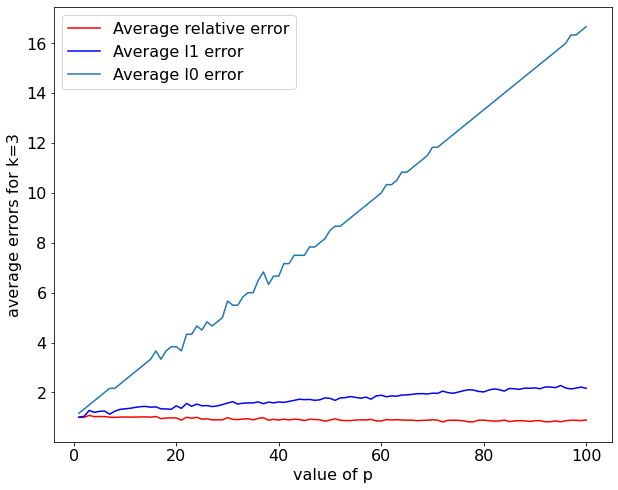

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


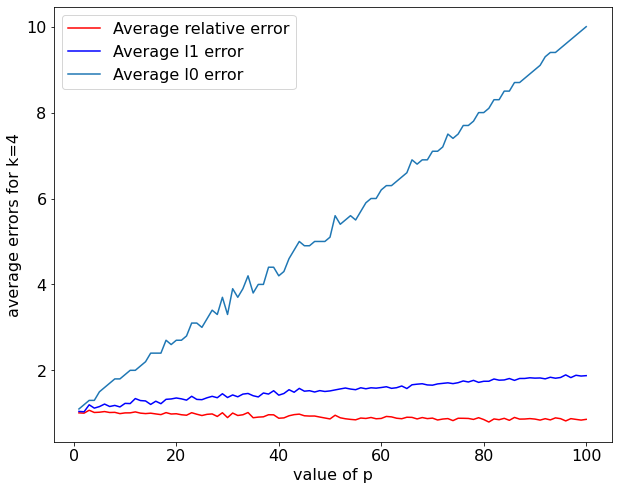

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


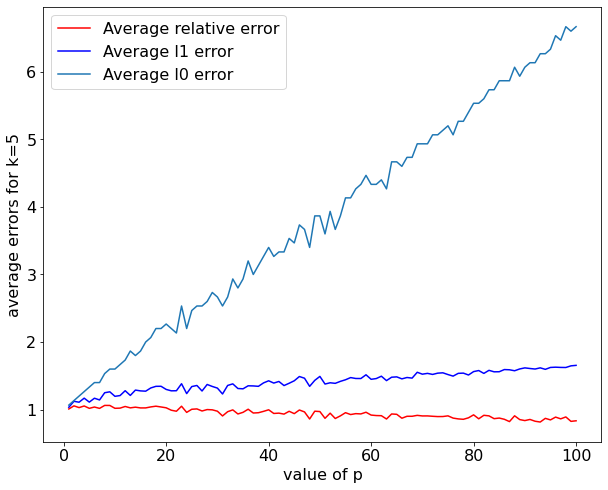

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


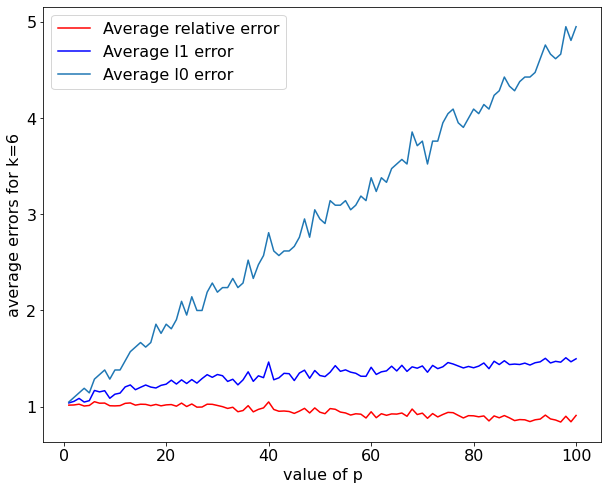

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


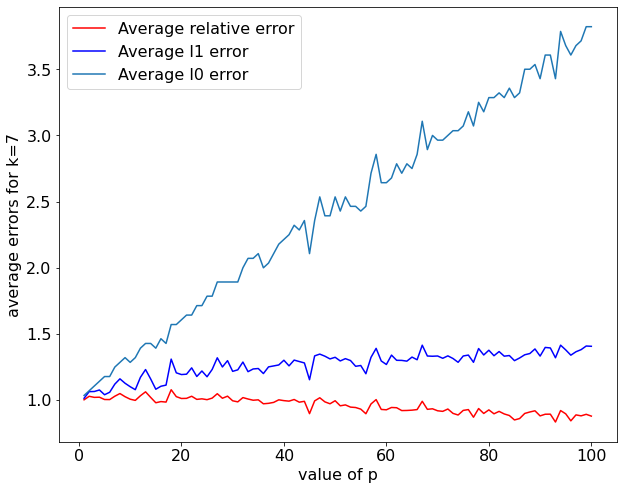

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


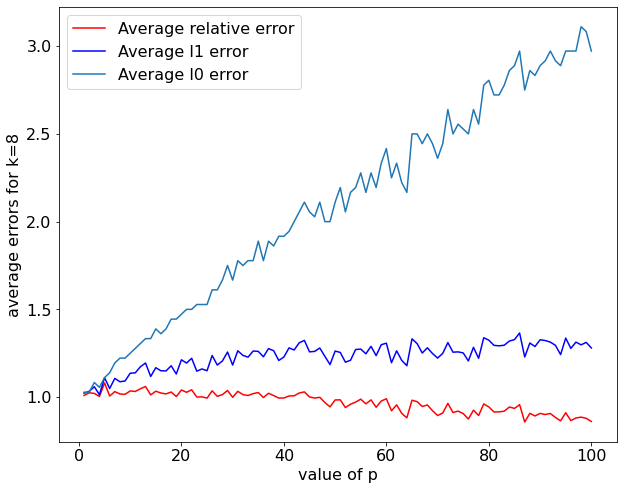

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


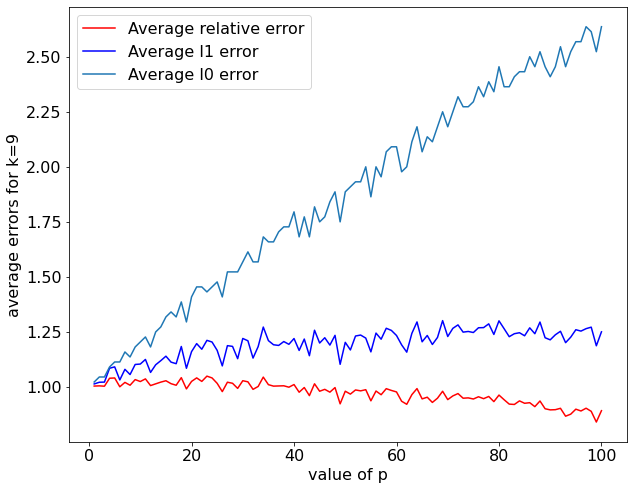

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


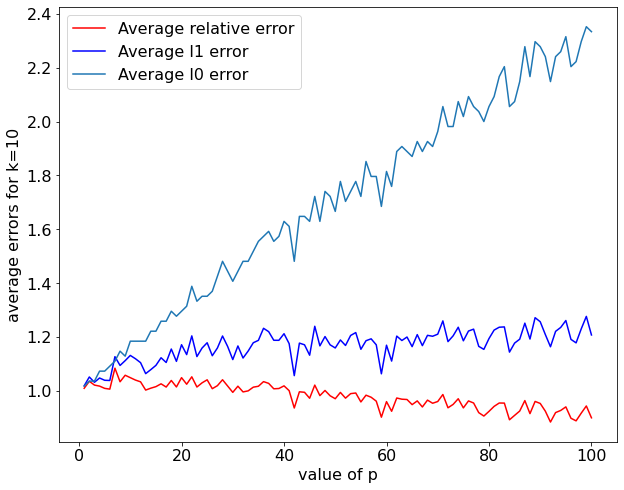

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


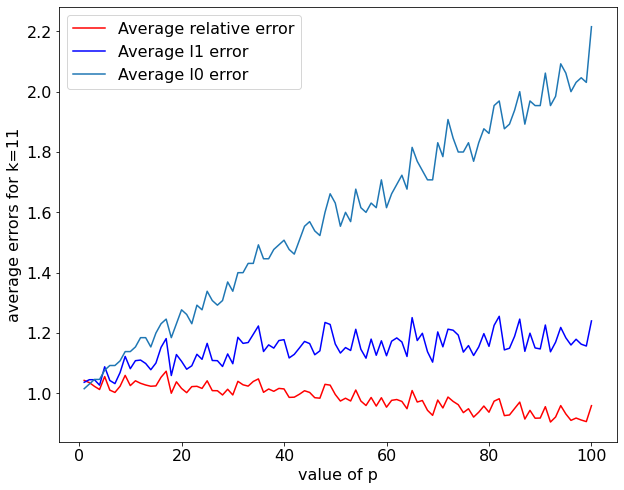

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


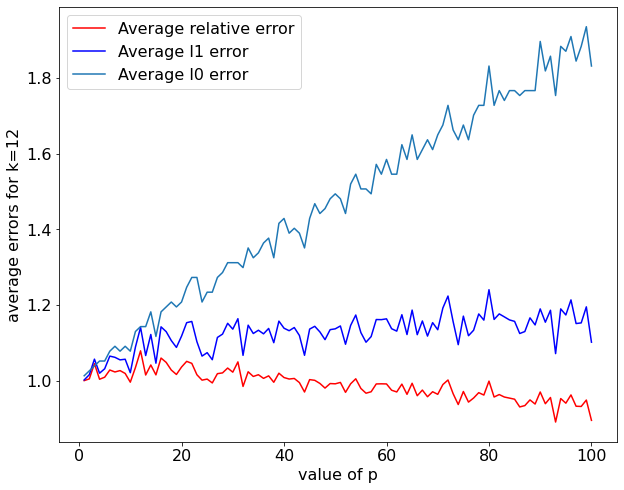

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


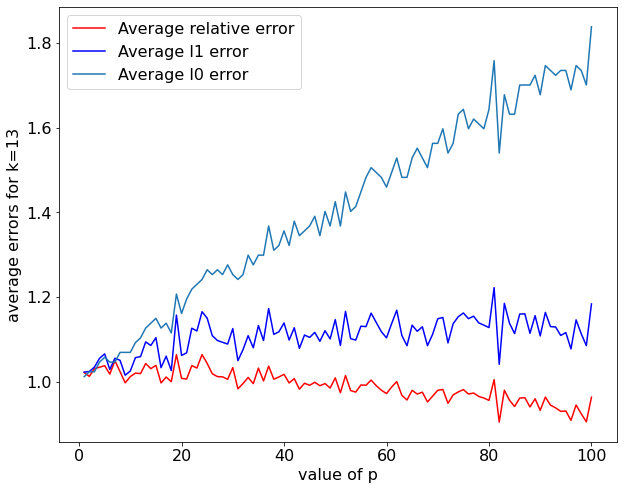

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


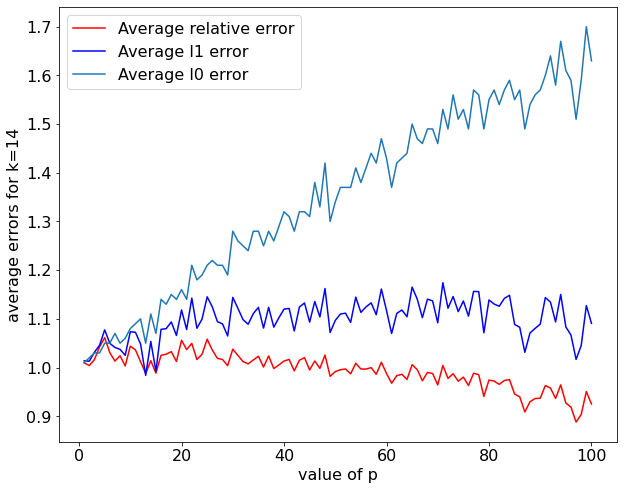

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


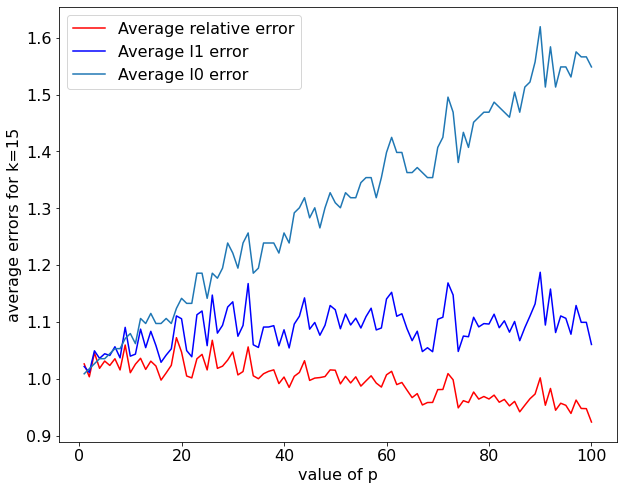

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


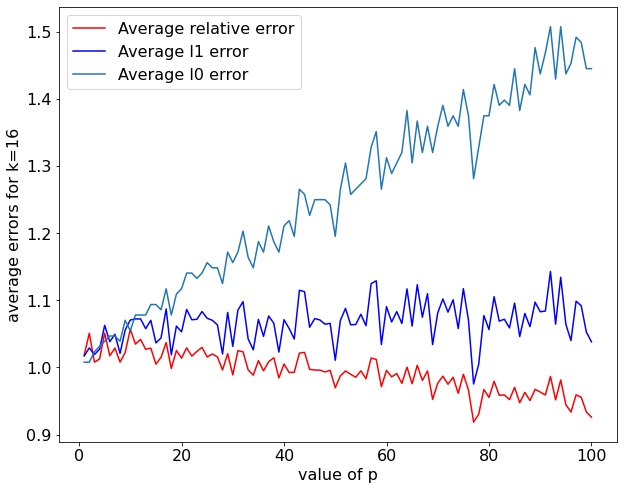

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


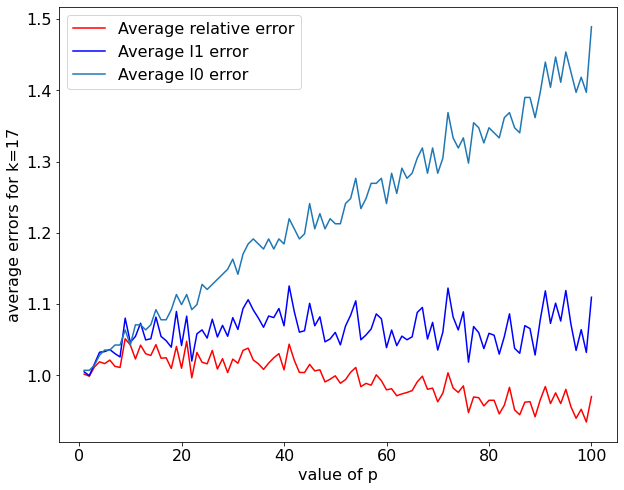

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


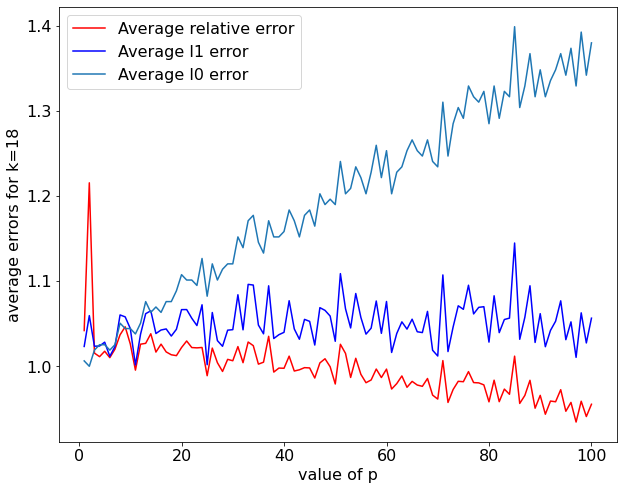

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


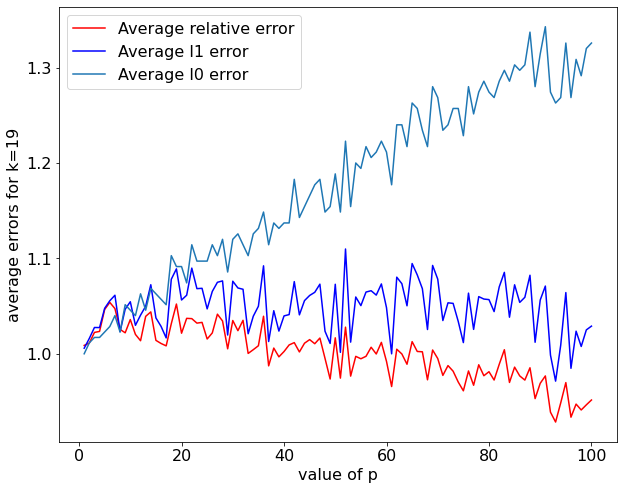

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


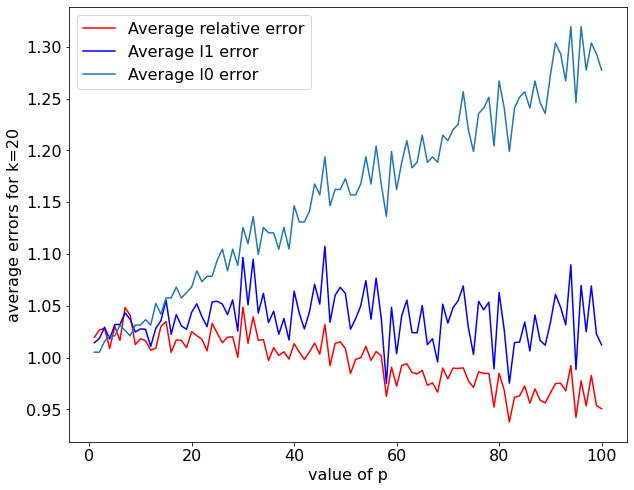

In [ ]:
#(b)
s2=np.zeros(n)
for k in np.arange(1,21):
  perm2 = np.floor(np.random.rand(k) * n).astype(int)
  s2[perm2]=1
  x2=Psi @ s2
  x22=np.linalg.norm(s2)
  x12=np.linalg.norm(s2,ord=1)
  x02=np.linalg.norm(s2,ord=0)
  
  err2=[]
  r_error2=[]
  err12=[]
  r_error12=[]
  err02=[]
  r_error02=[]
  
  for p in np.arange(1,101):
    C02=np.random.randn(p,n)
    y02=C02 @ x2
    Theta02=C02 @ Psi
    s_hat02=cosamp(Theta02,y02,p)
    e2= np.linalg.norm(s2-s_hat02)/x22  #average relative error
    err2.append(e2)
    e12= np.linalg.norm(s2-s_hat02,ord=1)/x12 #average l1 error
    err12.append(e12)
    e02= np.linalg.norm(s2-s_hat02,ord=0)/x02 # average l0 error
    err02.append(e02)
  
  plt.figure()
  plt.plot(np.arange(1,101),err2, color='r',label='Average relative error')
  plt.plot(np.arange(1,101),err12, color='b',label='Average l1 error')
  plt.plot(np.arange(1,101),err02,label='Average l0 error')
  plt.xlabel('value of p')
  plt.ylabel('average errors for k='+str(k))
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


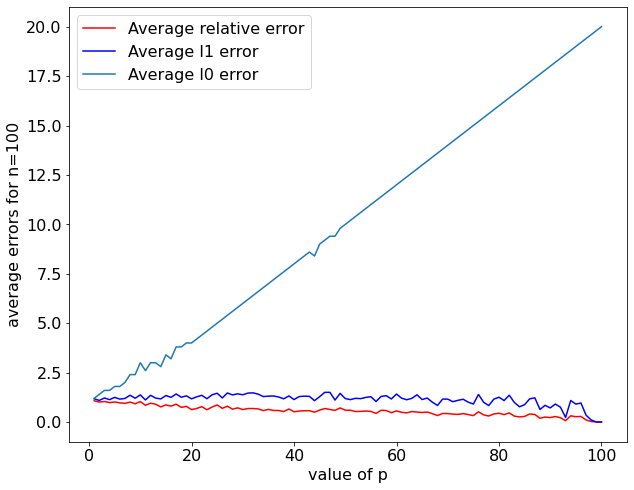

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


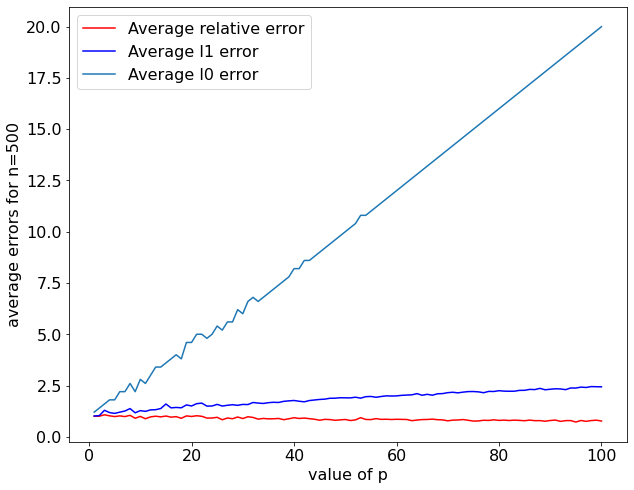

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


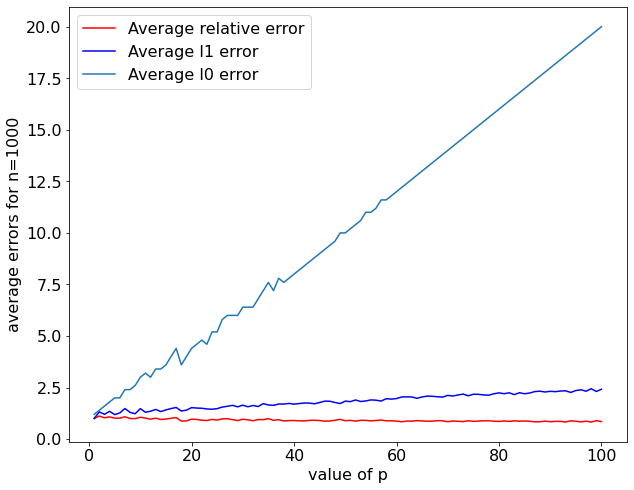

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


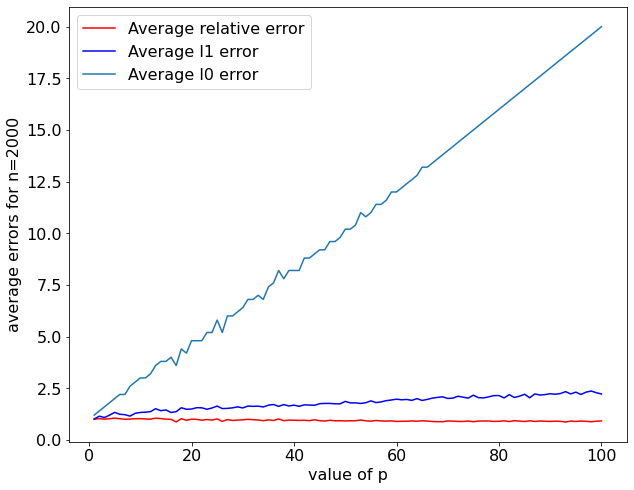

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


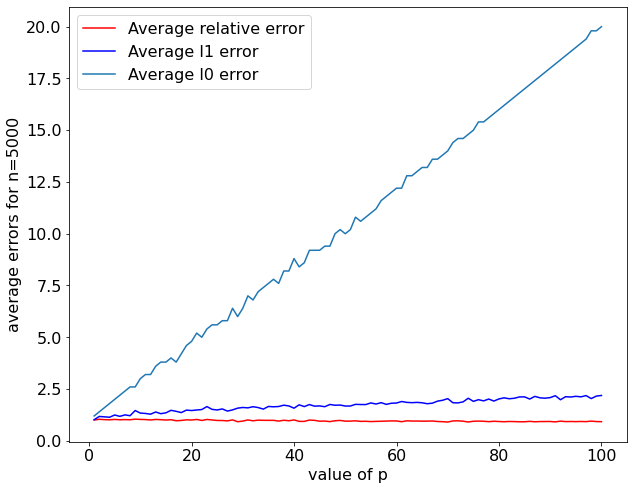

In [ ]:
#(c)
k=5

for n in [100,500,1000,2000,5000]:
  #Build Psi
  Psi3=dct(np.identity(n))
  s3=np.zeros(n)
  perm3 = np.floor(np.random.rand(k) * n).astype(int)
  s3[perm3]=1

  x3=Psi3 @ s3
  x33=np.linalg.norm(s3)
  x13=np.linalg.norm(s3,ord=1)
  x03=np.linalg.norm(s3,ord=0)
  
  err3=[]
  err13=[]
  err03=[]
  
  for p in np.arange(1,101):
    C03=np.random.randn(p,n)
    y03=C03 @ x3
    Theta03=C03 @ Psi3
    s_hat03=cosamp(Theta03,y03,p)
    e3= np.linalg.norm(s3-s_hat03)/x33  #average relative error
    err3.append(e3)
    e13= np.linalg.norm(s3-s_hat03,ord=1)/x13 #average l1 error
    err13.append(e13)
    e03= np.linalg.norm(s3-s_hat03,ord=0)/x03 # average l0 error
    err03.append(e03)
  
  plt.figure()
  plt.plot(np.arange(1,101),err3, color='r',label='Average relative error')
  plt.plot(np.arange(1,101),err13, color='b',label='Average l1 error')
  plt.plot(np.arange(1,101),err03,label='Average l0 error')
  plt.xlabel('value of p')
  plt.ylabel('average errors for n='+str(n))
  plt.legend()
  plt.show()